# PnP

<img src="wzor.svg" alt="Drawing" style="width: 800px;"/>

Dane:
1) macierz kamery: camera_matrix

2) 9 punktow 3D wybranych na modelu: model_points

3) 9 keypoints w formie heatmapy: heat_img_"nr_zdjecia"_"nr_keypoints"

                                heat_img_000000_00
                                
                                heat_img_000000_01
                                
                                heat_img_000000_02
                                
                                heat_img_000000_03
                                
                                heat_img_000000_04
                                
                                heat_img_000000_05
                                
                                heat_img_000000_06
                                
                                heat_img_000000_07
                                
                                heat_img_000000_08
                                
4) wymiary obrazu wejsciowego i miejsce wyciecia: crop_"nr_zdjecia"

                                crop_000000
                                                
5) segmentacja obiektu: seg_img_"nr_zdjecia"

                                seg_img_000000
                    
6) GT rotacji(kwaternion) i translacji: "nr_folderu"_gt.npy

                                0050_gt.npy


<img src="000050-color.png" alt="Drawing" style="width: 800px;"/>

In [1]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import ndimage

camera_matrix = np.array([[1.066778e+03, 0.000000e+00, 3.129869e+02],
       [0.000000e+00, 1.067487e+03, 2.413109e+02],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]])

dist_coeffs = np.zeros((4,1))

In [2]:
model_points = np.array([#drill_ycb
    (-0.101005911827,0.047009292990,0.003920878284),
    (-0.037154082209,-0.107653088868,-0.013503172435),
    (0.045423928648,-0.106373451650,-0.019496466964),
    (0.002672282746,0.017537992448,-0.019606860355),
    (0.001261682715,0.019342577085,0.018263733014),
    (-0.015974249691,-0.012602778152,0.003121521091),
    (0.074148103595,0.057585820556,-0.014557955787),
    (0.074379354715,0.031028280035,-0.013706572354),
    (0.052770089358,-0.070011772215,0.000104412517),
    ])

In [3]:
numbers = re.compile(r'(\d+)')

def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [4]:
seg_img_paths = sorted(glob.glob(os.path.join("./0050/", 'seg_img_*')), key=numericalSort)

In [5]:
seg_img_paths

['./0050\\seg_img_000000.png',
 './0050\\seg_img_000001.png',
 './0050\\seg_img_000002.png',
 './0050\\seg_img_000003.png',
 './0050\\seg_img_000004.png',
 './0050\\seg_img_000005.png',
 './0050\\seg_img_000006.png',
 './0050\\seg_img_000007.png',
 './0050\\seg_img_000008.png',
 './0050\\seg_img_000009.png',
 './0050\\seg_img_000010.png',
 './0050\\seg_img_000011.png',
 './0050\\seg_img_000012.png',
 './0050\\seg_img_000013.png',
 './0050\\seg_img_000014.png',
 './0050\\seg_img_000015.png',
 './0050\\seg_img_000016.png',
 './0050\\seg_img_000017.png',
 './0050\\seg_img_000018.png',
 './0050\\seg_img_000019.png',
 './0050\\seg_img_000020.png',
 './0050\\seg_img_000021.png',
 './0050\\seg_img_000022.png',
 './0050\\seg_img_000023.png',
 './0050\\seg_img_000024.png',
 './0050\\seg_img_000025.png',
 './0050\\seg_img_000026.png',
 './0050\\seg_img_000027.png',
 './0050\\seg_img_000028.png',
 './0050\\seg_img_000029.png',
 './0050\\seg_img_000030.png',
 './0050\\seg_img_000031.png',
 './0050

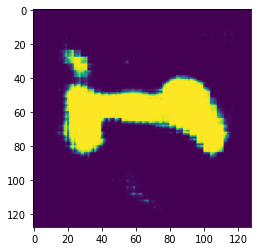

In [6]:
im = cv2.imread(seg_img_paths[50])
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))

In [7]:
heat_img_paths = sorted(glob.glob(os.path.join("./0050/", 'heat_img_*')), key=numericalSort)

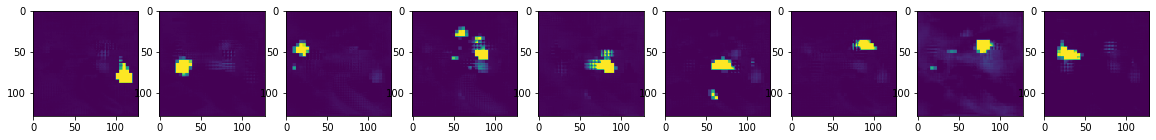

In [8]:
fig = plt.figure(figsize=(20,5))
for i in range(9):
    ax = fig.add_subplot(2,9,i+1)
    im = cv2.imread(heat_img_paths[i+50*9])
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
plt.show()

In [9]:
crop_img_paths = sorted(glob.glob(os.path.join("./0050/", 'crop_*')), key=numericalSort)

In [10]:
crop_img_paths

['./0050\\crop_000000.npy',
 './0050\\crop_000001.npy',
 './0050\\crop_000002.npy',
 './0050\\crop_000003.npy',
 './0050\\crop_000004.npy',
 './0050\\crop_000005.npy',
 './0050\\crop_000006.npy',
 './0050\\crop_000007.npy',
 './0050\\crop_000008.npy',
 './0050\\crop_000009.npy',
 './0050\\crop_000010.npy',
 './0050\\crop_000011.npy',
 './0050\\crop_000012.npy',
 './0050\\crop_000013.npy',
 './0050\\crop_000014.npy',
 './0050\\crop_000015.npy',
 './0050\\crop_000016.npy',
 './0050\\crop_000017.npy',
 './0050\\crop_000018.npy',
 './0050\\crop_000019.npy',
 './0050\\crop_000020.npy',
 './0050\\crop_000021.npy',
 './0050\\crop_000022.npy',
 './0050\\crop_000023.npy',
 './0050\\crop_000024.npy',
 './0050\\crop_000025.npy',
 './0050\\crop_000026.npy',
 './0050\\crop_000027.npy',
 './0050\\crop_000028.npy',
 './0050\\crop_000029.npy',
 './0050\\crop_000030.npy',
 './0050\\crop_000031.npy',
 './0050\\crop_000032.npy',
 './0050\\crop_000033.npy',
 './0050\\crop_000034.npy',
 './0050\\crop_00003

In [11]:
crop_param = np.load(crop_img_paths[50])
print(crop_param)

[320 128  19]


[Rozmiar prawdziwej ramki, przesuniecie na y, przesuniecie na x]

In [12]:
gt = np.load("./0050_gt.npy")
print(gt[50])

[ 0.29847626  0.47467754  0.65986929 -0.50016565 -0.09428038  0.03635521
  0.9684669 ]


[kwaternion(4elementy), translacja(3elementy)]

In [13]:
#funkcje do zamiany heatmap do x,y
def get_ave_xy(hmi, n_points = 4, thresh=0, average=False):
    '''
    hmi      : heatmap np array of size (height,width)
    n_points : x,y coordinates corresponding to the top  densities to calculate average (x,y) coordinates
    
    
    convert heatmap to (x,y) coordinate
    x,y coordinates corresponding to the top  densities 
    are used to calculate weighted average of (x,y) coordinates
    the weights are used using heatmap
    
    if the heatmap does not contain the probability > 
    then we assume there is no predicted landmark, and 
    x = -1 and y = -1 are recorded as predicted landmark.
    '''
    if n_points < 1:
        ## Use all
        hsum, n_points = np.sum(hmi), len(hmi.flatten())
        ind_hmi = np.array([range(input_width)]*input_height)
        i1 = np.sum(ind_hmi * hmi)/hsum
        ind_hmi = np.array([range(input_height)]*input_width).T
        i0 = np.sum(ind_hmi * hmi)/hsum
    else:
        ind = hmi.argsort(axis=None)[-n_points:] ## pick the largest n_points
        topind = np.unravel_index(ind, hmi.shape)
        index = np.unravel_index(hmi.argmax(), hmi.shape)
        i0, i1, hsum = 0, 0, 0
        for ind in zip(topind[0],topind[1]):
            h  = hmi[ind[0],ind[1]]
            if not average:
                hsum += h
                i0   += ind[0]*h
                i1   += ind[1]*h
            else:
                hsum += 1
                i0 += ind[0]
                i1 += ind[1]

        i0 /= hsum
        i1 /= hsum
    if hsum/n_points <= thresh:
        i0, i1 = -1, -1
    return([i1,i0])

def transfer_xy_coord(hm, n_points = 64, thresh=0.2, average=False):
    '''
    hm : np.array of shape (height,width, n-heatmap)
    
    transfer heatmap to (x,y) coordinates
    
    the output contains np.array (Nlandmark * 2,) 
    * 2 for x and y coordinates, containing the landmark location.
    '''
    assert len(hm.shape) == 3
    Nlandmark = hm.shape[-1]
    #est_xy = -1*np.ones(shape = (Nlandmark, 2))
    est_xy = []
    for i in range(Nlandmark):
        hmi = hm[:,:,i]
        est_xy.extend(get_ave_xy(hmi, n_points, thresh, average))
    return(est_xy) ## (Nlandmark * 2,) 

def transfer_target(y_pred, thresh=0, n_points = 64, average=False):
    '''
    y_pred : np.array of the shape (N, height, width, Nlandmark)
    
    output : (N, Nlandmark * 2)
    '''
    y_pred_xy = []
    for i in range(y_pred.shape[0]):
        hm = y_pred[i]
        y_pred_xy.append(transfer_xy_coord(hm,n_points, thresh, average))
    return(np.array(y_pred_xy))

In [14]:
skip = 10
gt_skip = gt[::skip].copy()
pnp_results = np.zeros((len(seg_img_paths)//skip,6))
                       
for i in range(len(seg_img_paths)//skip):
    
    #wczytanie heatmap   
    y_pred = np.zeros((128,128,9))
    for j in range(9):
        im = cv2.imread(heat_img_paths[(i*skip)*9+j])
        y_pred[:,:,j] = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    y_pred = y_pred.reshape(-1,128,128,9)
    #wczytanie heatmap   
    
    #wczytanie crop
    crop_param = np.load(crop_img_paths[i*skip])
    
    #zamiana heatmap na wspolrzedne x,y *****************************************************************************
    n_points = 25
    keypoints = transfer_target(y_pred,0,n_points)
    keypoints = keypoints.reshape((9,2))
    
    tmp_model_points = []
    tmp_keypoints = []
    seg = cv2.cvtColor(cv2.imread(seg_img_paths[i]), cv2.COLOR_BGR2GRAY)
    
    for j in range(9):    # tutaj mozna wyrzuca punkty    
        tmp_keypoints.append(keypoints[j,:])
        tmp_model_points.append(model_points[j])

    keypoints = np.array(tmp_keypoints)
    tmp_model_points = np.array(model_points)
    # print(keypoints.shape)
    
    keypoints /= 128
    keypoints *= crop_param[0]
    keypoints[:,0] += crop_param[2]
    keypoints[:,1] += crop_param[1]
    #zamiana heatmap na wspolrzedne x,y *****************************************************************************
    

    
    (success, rotation_vector, translation_vector) = cv2.solvePnP(tmp_model_points, keypoints, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_EPNP)
    
#     (success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, keypoints, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_EPNP)
#     retval, rotation_vector, translation_vector, inliers = cv2.solvePnPRansac(model_points, keypoints, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_EPNP)
    
    pnp_results[i,:3] = rotation_vector.reshape((3))
    pnp_results[i,3:] = translation_vector.reshape((3))                       

In [15]:
def calculate_pnp(pnp='default', flag=cv2.SOLVEPNP_EPNP, n_points=24, average=False):
    skip = 10
    gt_skip = gt[::skip].copy()
    pnp_results = np.zeros((len(seg_img_paths)//skip,6))

    for i in range(len(seg_img_paths)//skip):

        #wczytanie heatmap   
        y_pred = np.zeros((128,128,9))
        for j in range(9):
            im = cv2.imread(heat_img_paths[(i*skip)*9+j])
            y_pred[:,:,j] = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        y_pred = y_pred.reshape(-1,128,128,9)
        #wczytanie heatmap   

        #wczytanie crop
        crop_param = np.load(crop_img_paths[i*skip])

        #zamiana heatmap na wspolrzedne x,y *****************************************************************************
        
        keypoints = transfer_target(y_pred,0,n_points, average=average)
        keypoints = keypoints.reshape((9,2))

        tmp_model_points = []
        tmp_keypoints = []
        seg = cv2.cvtColor(cv2.imread(seg_img_paths[i]), cv2.COLOR_BGR2GRAY)

        for j in range(9):    # tutaj mozna wyrzuca punkty    
            tmp_keypoints.append(keypoints[j,:])
            tmp_model_points.append(model_points[j])


        keypoints = np.array(tmp_keypoints)
        tmp_model_points = np.array(model_points)
        # print(keypoints.shape)

        keypoints /= 128
        keypoints *= crop_param[0]
        keypoints[:,0] += crop_param[2]
        keypoints[:,1] += crop_param[1]
        #zamiana heatmap na wspolrzedne x,y *****************************************************************************

        if pnp == 'default':
            (success, rotation_vector, translation_vector) = cv2.solvePnP(tmp_model_points, keypoints, camera_matrix, dist_coeffs, flags=flag)
        elif pnp == 'ransac':
            retval, rotation_vector, translation_vector, inliers = cv2.solvePnPRansac(tmp_model_points, keypoints, camera_matrix, dist_coeffs, flags=flag)
        else:
            raise ValueError('Wrong PNP')
            
        pnp_results[i,:3] = rotation_vector.reshape((3))
        pnp_results[i,3:] = translation_vector.reshape((3))
        
    return gt_skip, pnp_results

## Metryka ADD

In [16]:
#wczytanie modelu jako chmury punktow
import plyfile
data = plyfile.PlyData.read('./power_drill_points.ply')['vertex']
model_ply = np.c_[data['x'], data['y'], data['z']]

#10% maksymalnej odleglosci
add_metric = np.sqrt((np.max(model_ply[:,0])-np.min(model_ply[:,0]))**2+(np.max(model_ply[:,1])-np.min(model_ply[:,1]))**2+(np.max(model_ply[:,2])-np.min(model_ply[:,2]))**2)/10
print(add_metric)

0.026833180743021573


In [17]:
from scipy.spatial.transform import Rotation as R

def add(rot, rot_gt, model): #nie sym
    pts_est = transform_points(model,rot)
    pts_gt = transform_points(model,rot_gt)
    diff = pts_est - pts_gt
    error = np.mean(np.sqrt(np.sum(diff**2, axis=1)))
    return error
    
def transform_points(model,rot):
    model_2 = np.ones((model.shape[0],4))
    model_2[:,:3] = model
    pts_new =  model_2.dot(rot.T)
    return pts_new

def count_add(GT, pnp_results, add_metric):
    nb_img = pnp_results.shape[0]
    
    add_all = np.zeros((nb_img))
    add_all_proc = np.zeros((nb_img))
    
    for i in range(nb_img): 
        
        rot_gt = np.zeros((3,4))
        r = R.from_quat(GT[i,:4])
        rot_gt[:,:3] = r.as_matrix()
        rot_gt[:,3] = GT[i,4:] 
        rot_gt[:,3] = rot_gt[:,3]
        

        rot = np.zeros((3,4))
        r = R.from_rotvec(pnp_results[i,:3])
        rot[:,:3] = r.as_matrix()
        rot[:,3] = pnp_results[i,3:]

        add_all[i] = add(rot,rot_gt,model_ply)

        add_all_proc[i] = add_all[i, add_all[i]<add_metric].shape[0]
#     return np.average(add_all_proc)
    return np.average(add_all_proc), add_all

In [18]:
add_proc,  add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.49214659685863876


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


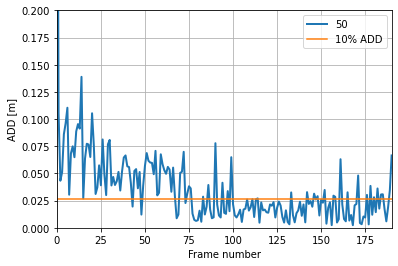

In [19]:
def plot_pnp_results_quality(pnp_results):
    nb_img = pnp_results.shape[0]

    d = np.zeros(nb_img)
    add_line = np.zeros(nb_img)
    for i in range(0,nb_img):
        d[i] = i
        add_line[i] = add_metric


    name = "50"
    # plt.title(name)
    plt.ylabel("ADD [m]")
    plt.xlabel("Frame number")
    plt.grid(True)
    line1,= plt.plot(d,add_all, linestyle= 'solid', linewidth=2, label=name)
    line5,=plt.plot(d,add_line,label="10% ADD")


    plt.legend(handles=[line1,line5])


    plt.ylim(ymin=0,ymax=0.2)
    plt.xlim(xmin=0,xmax=nb_img-1)
    plt.savefig(name+"_add.png",bbox_inches = 'tight')
    plt.savefig(name+"_add.eps",format='eps',bbox_inches = 'tight')

    plt.show()
    
plot_pnp_results_quality(pnp_results)

Porownac ADD dla kilku wersji PnP

Poeksperymentowac z zamiana heatmap na keypoints - sprawdzic inne metody

Przetestowac wyrzucanie najgorszych punktow z urzyciem TOPSIS

## PNP versions

In [20]:
# default - EPNP
gt_skip, pnp_results = calculate_pnp('default', flag=cv2.SOLVEPNP_EPNP)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.5078534031413613


In [21]:
# default - SQPNP
gt_skip, pnp_results = calculate_pnp('default', flag=cv2.SOLVEPNP_SQPNP)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.5916230366492147


In [22]:
# ransac - EPNP
gt_skip, pnp_results = calculate_pnp('ransac', flag=cv2.SOLVEPNP_EPNP)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.450261780104712


In [23]:
# ransac - SQPNP
gt_skip, pnp_results = calculate_pnp('ransac', flag=cv2.SOLVEPNP_SQPNP)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.5235602094240838


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


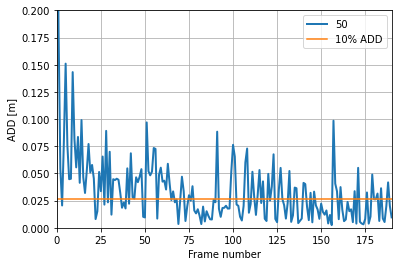

In [24]:
best_pnp = 'default'
best_flag = cv2.SOLVEPNP_SQPNP

gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag)
plot_pnp_results_quality(pnp_results)

## Keypoints extraction

In [25]:
# 24 points 
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=24)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.5916230366492147


In [26]:
# 64 points 
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=64)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6073298429319371


In [27]:
# 4 points 
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=4)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.450261780104712


In [28]:
# 1 point 
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=1)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.18324607329842932


In [29]:
# 100 points
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=100)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6230366492146597


In [30]:
# 200 points
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=200)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6178010471204188


In [31]:
# average instead weighted average - 100 points
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=100, average=True)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6230366492146597


In [32]:
# average instead weighted average - 200 points
gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=200, average=True)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.5235602094240838


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


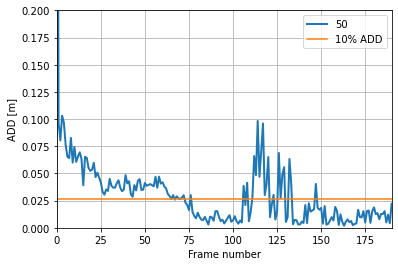

In [33]:
best_n_points = 100
best_average = False

gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=best_n_points, average=best_average)
plot_pnp_results_quality(pnp_results)

## Topsis

In [34]:
def apply_canny( src, ksize=7, sigma=1.2, low_th=30, high_th=120):
    """Apply canny edge detection.
    """
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    blur_gray = cv2.GaussianBlur(gray,(ksize, ksize), sigma)
    dst = cv2.Canny(blur_gray, low_th, high_th) 

    return dst 

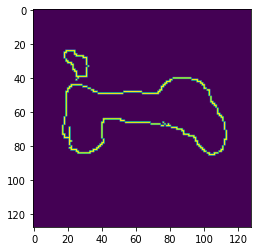

In [35]:
im = cv2.imread(seg_img_paths[50])
im = apply_canny(im)
plt.imshow(im)

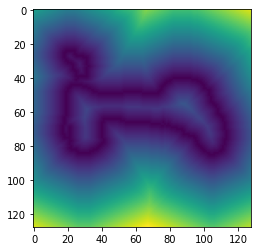

In [36]:
im = 255 - im
dist = cv2.distanceTransform(im, cv2.DIST_L2, 3)
plt.imshow(dist)

In [37]:
def Normalize(temp_dataset, nCol, weights):
    for i in range(1, nCol):
        temp = 0
        for j in range(len(temp_dataset)):
            temp = temp + temp_dataset.iloc[j, i]**2
        temp = temp**0.5
        for j in range(len(temp_dataset)):
            temp_dataset.iat[j, i] = (
                temp_dataset.iloc[j, i] / temp)*weights[i-1]
    return temp_dataset


def Calc_Values(temp_dataset, nCol, impact):
    p_sln = (temp_dataset.max().values)[1:]
    n_sln = (temp_dataset.min().values)[1:]
    for i in range(1, nCol):
        if impact[i-1] == '-':
            p_sln[i-1], n_sln[i-1] = n_sln[i-1], p_sln[i-1]
    return p_sln, n_sln


def topsis_pipy(temp_dataset, dataset, nCol, weights, impact):

    temp_dataset = Normalize(temp_dataset, nCol, weights)

    p_sln, n_sln = Calc_Values(temp_dataset, nCol, impact)

    score = []
    for i in range(len(temp_dataset)):
        temp_p, temp_n = 0, 0
        for j in range(1, nCol):
            temp_p = temp_p + (p_sln[j-1] - temp_dataset.iloc[i, j])**2
            temp_n = temp_n + (n_sln[j-1] - temp_dataset.iloc[i, j])**2
        temp_p, temp_n = temp_p**0.5, temp_n**0.5
        score.append(temp_n/(temp_p + temp_n))
    dataset['Topsis Score'] = score

    dataset['Rank'] = (dataset['Topsis Score'].rank(
        method='max', ascending=False))
    dataset = dataset.astype({"Rank": int})
    # print(dataset)
    
    indx = 0
    for i in range(9):
        if dataset["Rank"][i] == 9:
            indx = i
    return indx

In [38]:
import pandas as pd
idx = 50
im = cv2.imread(seg_img_paths[idx])
nr_points = 9
heatmap_val = np.zeros(nr_points)
dt_val = np.zeros(nr_points)

for i in range(nr_points):  #przypisac wartosc
    heatmap_val[i] = cv2.imread(heat_img_paths[idx*9+j])
    dt_val[i] = cv2.distanceTransform(im, cv2.DIST_L2, 3)


temp_dataset = pd.DataFrame({"Heatmap":heatmap_val,
                    "DT":dt_val,
                    "Keypoint":list(range(0, nr_points))})
temp_dataset = temp_dataset[['Keypoint', 'Heatmap', 'DT']]
dataset = pd.DataFrame({"Heatmap":heatmap_val,
                    "DT":dt_val,
                    "Keypoint":list(range(0, nr_points))})
dataset = dataset[['Keypoint', 'Heatmap', 'DT']]

nCol = 3 #pierwsza kolumna numeracja potem wartosci
weights = np.array([1,1])
impact = ["+","-"] #heatmap, dt
indeks = topsis_pipy(temp_dataset, dataset, nCol, weights, impact) #uzyskac indeks keypoint do wyrzucenia

ValueError: setting an array element with a sequence.

In [39]:
def calculate_pnp_topsis(pnp='default', flag=cv2.SOLVEPNP_EPNP, n_points=24, average=False):
    skip = 10
    gt_skip = gt[::skip].copy()
    pnp_results = np.zeros((len(seg_img_paths)//skip,6))

    for i in range(len(seg_img_paths)//skip):

        #wczytanie heatmap   
        y_pred = np.zeros((128,128,9))
        for j in range(9):
            im = cv2.imread(heat_img_paths[(i*skip)*9+j])
            y_pred[:,:,j] = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        y_pred = y_pred.reshape(-1,128,128,9)
        #wczytanie heatmap   

        #wczytanie crop
        crop_param = np.load(crop_img_paths[i*skip])

        #zamiana heatmap na wspolrzedne x,y *****************************************************************************
        
        keypoints = transfer_target(y_pred,0,n_points, average=average)
        keypoints = keypoints.reshape((9,2))
        
        heatmap_val = np.zeros(9)
        dt_val = np.zeros(9)
        img = cv2.imread(seg_img_paths[i], cv2.COLOR_BGR2GRAY)
        dist = cv2.distanceTransform(img, cv2.DIST_L2, 3)
        for k in range(9):  #przypisac wartosc
            heatmap_val[k] = y_pred[0][round(keypoints[k][0])][round(keypoints[k][1])][k]
            dt_val[k] = max(dist[round(keypoints[k][0])][round(keypoints[k][1])], 0.000000001)
            
        tmp_model_points = []
        tmp_keypoints = []
        # seg = cv2.cvtColor(cv2.imread(seg_img_paths[i]), cv2.COLOR_BGR2GRAY)
        
        temp_dataset = pd.DataFrame({"Heatmap":heatmap_val,
                    "DT":dt_val,
                    "Keypoint":list(range(0, 9))})
        temp_dataset = temp_dataset[['Keypoint', 'Heatmap', 'DT']]
        dataset = pd.DataFrame({"Heatmap":heatmap_val,
                            "DT":dt_val,
                            "Keypoint":list(range(0, 9))})
        dataset = dataset[['Keypoint', 'Heatmap', 'DT']]

        nCol = 3 #pierwsza kolumna numeracja potem wartosci
        weights = np.array([1,1])
        impact = ["+","-"] #heatmap, dt
        indeks = topsis_pipy(temp_dataset, dataset, nCol, weights, impact) #uzyskac indeks keypoint do wyrzucenia

        for j in range(9):    # tutaj mozna wyrzuca punkty
            if j != indeks:
                tmp_keypoints.append(keypoints[j,:])
                tmp_model_points.append(model_points[j])


        keypoints = np.array(tmp_keypoints)
        tmp_model_points = np.array(tmp_model_points)
        # print(keypoints.shape)

        keypoints /= 128
        keypoints *= crop_param[0]
        keypoints[:,0] += crop_param[2]
        keypoints[:,1] += crop_param[1]
        #zamiana heatmap na wspolrzedne x,y *****************************************************************************

        if pnp == 'default':
            (success, rotation_vector, translation_vector) = cv2.solvePnP(tmp_model_points, keypoints, camera_matrix, dist_coeffs, flags=flag)
        elif pnp == 'ransac':
            retval, rotation_vector, translation_vector, inliers = cv2.solvePnPRansac(tmp_model_points, keypoints, camera_matrix, dist_coeffs, flags=flag)
        else:
            raise ValueError('Wrong PNP')
            
        pnp_results[i,:3] = rotation_vector.reshape((3))
        pnp_results[i,3:] = translation_vector.reshape((3))
        
    return gt_skip, pnp_results

In [40]:
# default - 100 points

gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=100)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6230366492146597


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.6282722513089005


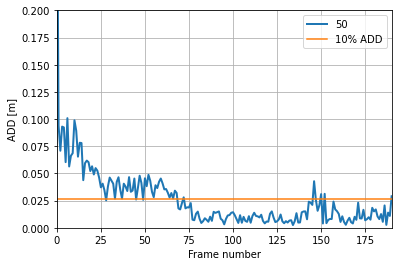

In [41]:
# topsis - 100 points

gt_skip, pnp_results = calculate_pnp_topsis(best_pnp, flag=best_flag, n_points=100, average=best_average)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

plot_pnp_results_quality(pnp_results)

In [42]:
# default - 120 points

gt_skip, pnp_results = calculate_pnp(best_pnp, flag=best_flag, n_points=120)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6230366492146597


In [43]:
# topsis - 120 points

gt_skip, pnp_results = calculate_pnp_topsis(best_pnp, flag=best_flag, n_points=120, average=best_average)
add_proc, add_all = count_add(gt_skip, pnp_results, add_metric)
print(add_proc)

0.6178010471204188
